<a href="https://colab.research.google.com/github/sanketgawali123/icc-data-analysis/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
# Mount your drive and read the csv file.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid",{'grid.linestyle': '--'})

## Exploratory Data Analysis

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Capstone Project/Bike Sharing Demand Prediction/Data & Resources/SeoulBikeData.csv"
bike_data = pd.read_csv(path, encoding = "ISO-8859-1")

In [ ]:
bike = bike_data.copy()
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
bike.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
bike.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
bike.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
bike.shape

(8760, 14)

In [ ]:
bike.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
bike.duplicated().sum()

0

In [ ]:
bike['Date'] = pd.to_datetime(bike['Date'])
bike['Month'] = bike['Date'].dt.month_name()
bike['day_of_week'] = bike['Date'].dt.day_name()
bike['weekdays_weekend'] = bike['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike['Year'] = bike['Date'].apply(lambda x : x.year).astype("object")
bike = bike.drop(columns = ['Date','day_of_week'], axis=1)

## Data Visualization

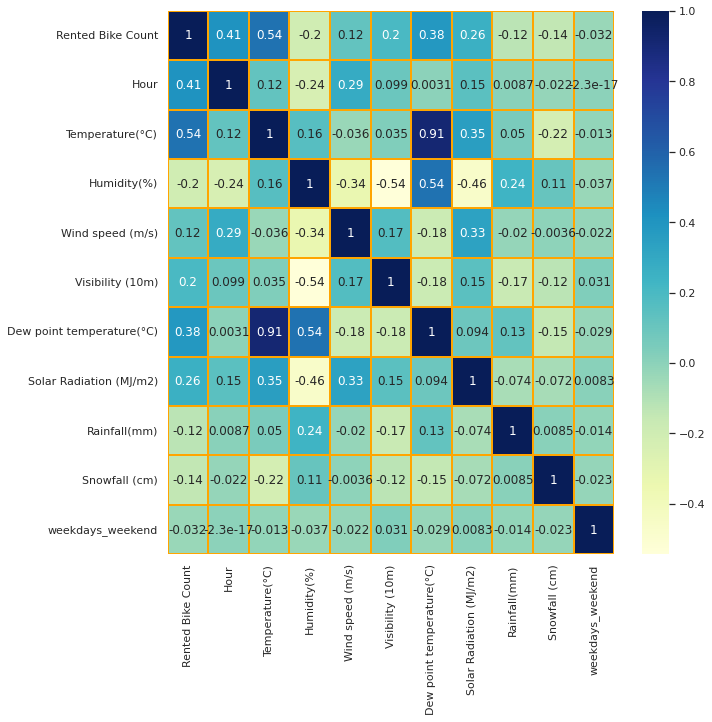

In [ ]:
#ploting heatmap
plt.figure(figsize = (10,10))
sns.heatmap(bike.corr(), cmap = 'YlGnBu', annot = True, linewidth = 1, linecolor = 'orange')

In [ ]:
bike['Hour'] = bike['Hour'].astype('object')

In [ ]:
# Correlation with Rented Bike Count
bike.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
weekdays_weekend            -0.032259
Name: Rented Bike Count, dtype: float64

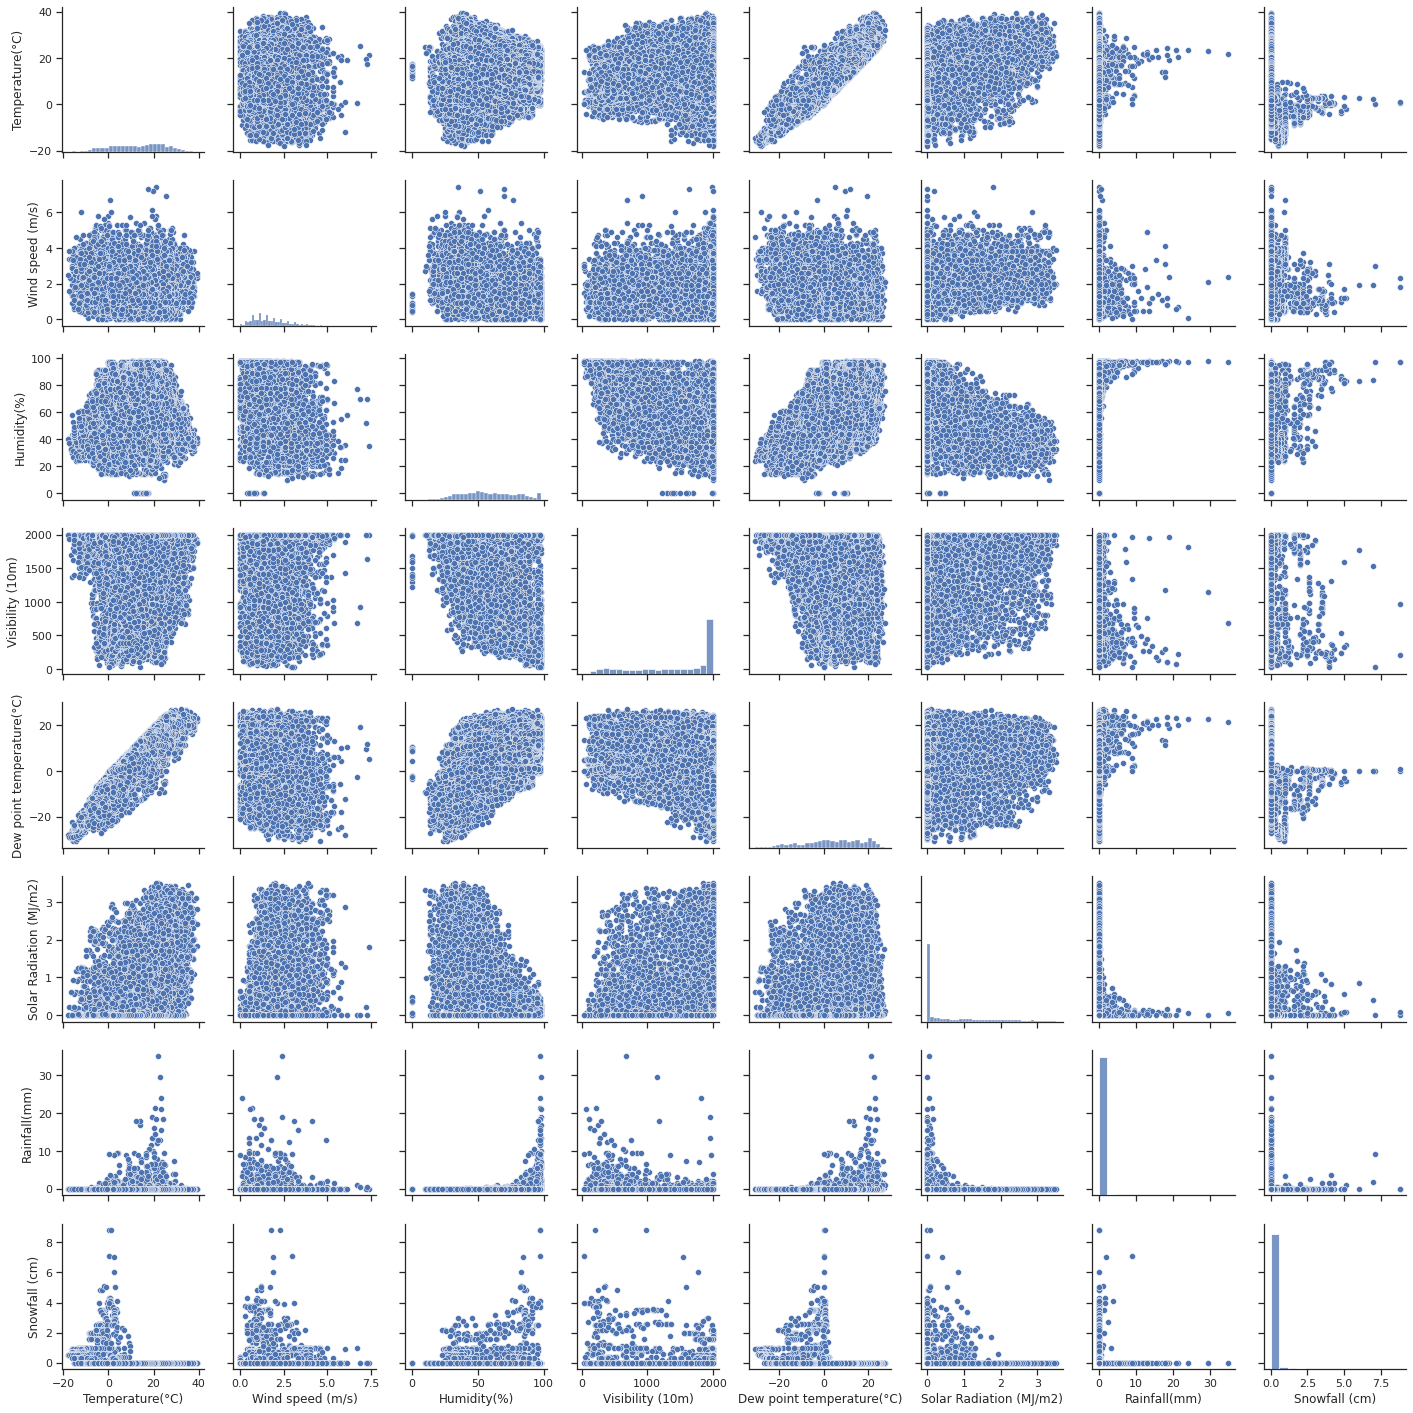

In [ ]:
#ploting pairplot for more info
col = ['Temperature(°C)','Wind speed (m/s)','Humidity(%)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']
sns.set(style="ticks", color_codes=True)
sns.pairplot(bike[col])
plt.show();

We can see many of the featues have high correlations thus next we will choose better features to represent the data more efficently and reduce the compuational complexity.

In [ ]:
numeric_features = bike.select_dtypes(exclude = 'object')
categorical_features = bike.select_dtypes(include = 'object')

## TimeLine Analysis

### Value Counts 

In [ ]:
# checking categorical column value count
for i in categorical_features.columns:
    print("\n")
    print('column name : ',i)
    print(bike[i].value_counts())



column name :  Hour
0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64


column name :  Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64


column name :  Holiday
No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64


column name :  Functioning Day
Yes    8465
No      295
Name: Functioning Day, dtype: int64


column name :  Month
January      744
March        744
May          744
July         744
August       744
October      744
December     744
April        720
June         720
September    720
November     720
February     672
Name: Month, dtype: int64


column name :  Year
2018    8016
2017     744
Name: Year, dtype: int64


### Value Counts in Percentage

In [ ]:
# checking categorical column value count
for i in categorical_features.columns:
    print('feature name : ',i)
    print(bike[i].value_counts(normalize=True))
    print('\n')

feature name :  Hour
0     0.041667
1     0.041667
22    0.041667
21    0.041667
20    0.041667
19    0.041667
18    0.041667
17    0.041667
16    0.041667
15    0.041667
14    0.041667
13    0.041667
12    0.041667
11    0.041667
10    0.041667
9     0.041667
8     0.041667
7     0.041667
6     0.041667
5     0.041667
4     0.041667
3     0.041667
2     0.041667
23    0.041667
Name: Hour, dtype: float64


feature name :  Seasons
Spring    0.252055
Summer    0.252055
Autumn    0.249315
Winter    0.246575
Name: Seasons, dtype: float64


feature name :  Holiday
No Holiday    0.950685
Holiday       0.049315
Name: Holiday, dtype: float64


feature name :  Functioning Day
Yes    0.966324
No     0.033676
Name: Functioning Day, dtype: float64


feature name :  Month
January      0.084932
March        0.084932
May          0.084932
July         0.084932
August       0.084932
October      0.084932
December     0.084932
April        0.082192
June         0.082192
September    0.082192
November  

## Weather Analysis

### Value Counts

In [ ]:
# checking numeric column value count
for i in numeric_features.columns:
    print("\n")
    print('column name : ',i)
    print(bike[i].value_counts())



column name :  Rented Bike Count
0       295
122      19
223      19
262      19
165      18
       ... 
2096      1
2440      1
1600      1
3384      1
595       1
Name: Rented Bike Count, Length: 2166, dtype: int64


column name :  Temperature(°C)
 19.1    40
 20.5    40
 23.4    39
 7.6     38
 20.7    38
         ..
-13.6     1
-12.9     1
-12.6     1
 37.6     1
 36.9     1
Name: Temperature(°C), Length: 546, dtype: int64


column name :  Humidity(%)
53    173
97    173
43    164
57    159
56    157
     ... 
19     11
13      3
10      1
12      1
11      1
Name: Humidity(%), Length: 90, dtype: int64


column name :  Wind speed (m/s)
1.1    420
1.2    403
1.0    388
0.9    388
0.8    385
      ... 
7.2      1
6.1      1
7.3      1
6.9      1
5.7      1
Name: Wind speed (m/s), Length: 65, dtype: int64


column name :  Visibility (10m)
2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Nam

### Value Counts in Percentage

In [ ]:
# checking numeric column value count
for i in numeric_features.columns:
    print('feature name : ',i)
    print(bike[i].value_counts(normalize=True))
    print('\n')

feature name :  Rented Bike Count
0       0.033676
122     0.002169
223     0.002169
262     0.002169
165     0.002055
          ...   
2096    0.000114
2440    0.000114
1600    0.000114
3384    0.000114
595     0.000114
Name: Rented Bike Count, Length: 2166, dtype: float64


feature name :  Temperature(°C)
 19.1    0.004566
 20.5    0.004566
 23.4    0.004452
 7.6     0.004338
 20.7    0.004338
           ...   
-13.6    0.000114
-12.9    0.000114
-12.6    0.000114
 37.6    0.000114
 36.9    0.000114
Name: Temperature(°C), Length: 546, dtype: float64


feature name :  Humidity(%)
53    0.019749
97    0.019749
43    0.018721
57    0.018151
56    0.017922
        ...   
19    0.001256
13    0.000342
10    0.000114
12    0.000114
11    0.000114
Name: Humidity(%), Length: 90, dtype: float64


feature name :  Wind speed (m/s)
1.1    0.047945
1.2    0.046005
1.0    0.044292
0.9    0.044292
0.8    0.043950
         ...   
7.2    0.000114
6.1    0.000114
7.3    0.000114
6.9    0.000114
5.7   

## get information from our Numerical features

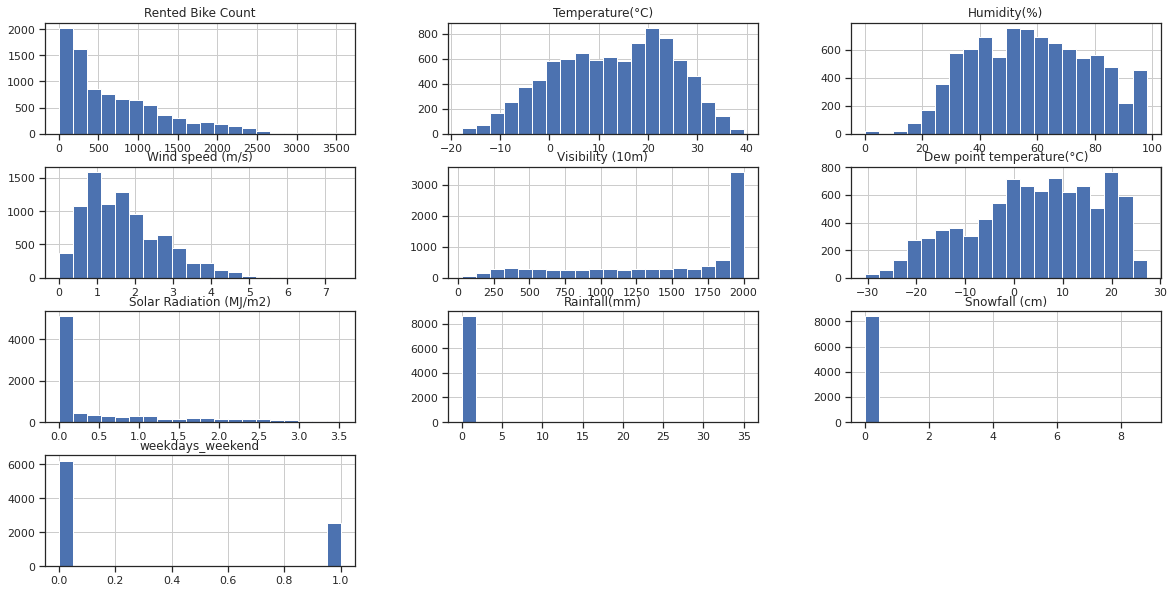

In [ ]:
numeric_features.hist(bins = 20 , figsize= (20,10)) ;

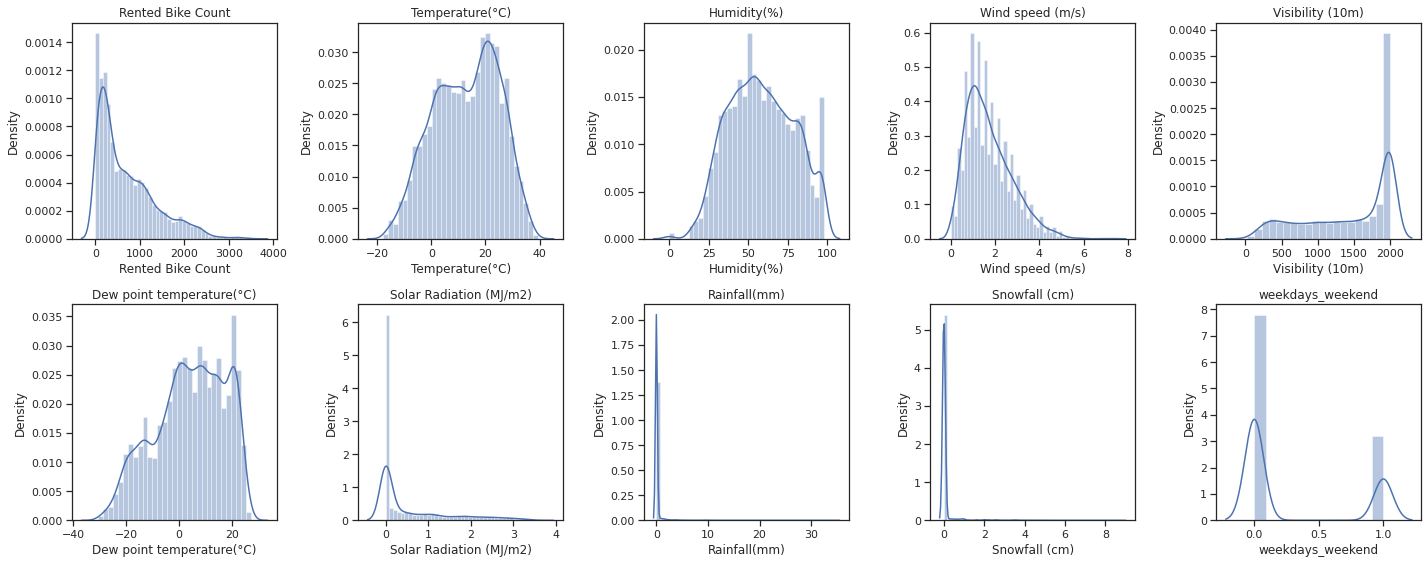

In [ ]:
# Distrubution of Data
n=1
plt.figure(figsize=(20,8))
for i in numeric_features.columns:
    plt.subplot(2,5,n) 
    n=n+1
    sns.distplot(bike[i],color="b")
    plt.title(i)
    plt.tight_layout()

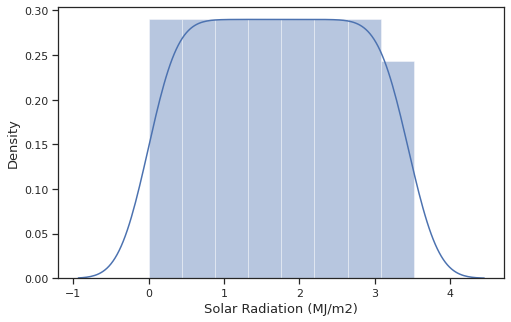

In [ ]:
plt.figure(figsize = (8,5))
bike_weather = pd.DataFrame(bike.groupby('Solar Radiation (MJ/m2)')['Rented Bike Count'].sum())
bike_weather.reset_index(inplace=True)
sns.distplot(bike_weather['Solar Radiation (MJ/m2)'])
plt.xlabel('Solar Radiation (MJ/m2)',size = 13)
plt.ylabel('Density',size = 13)
plt.show()

Text(0, 0.5, 'Density')

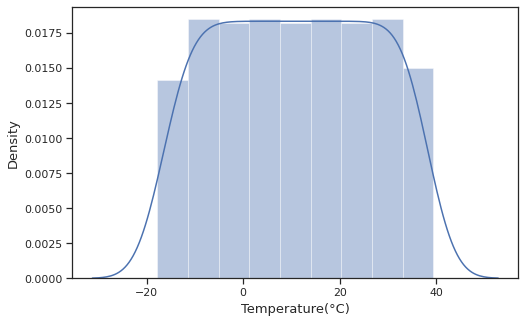

In [ ]:
plt.figure(figsize = (8,5))
bike_weather = pd.DataFrame(bike.groupby('Temperature(°C)')['Rented Bike Count'].sum())
bike_weather.reset_index(inplace=True)
sns.distplot(bike_weather['Temperature(°C)'])
plt.xlabel('Temperature(°C)',size = 13)
plt.ylabel('Density',size = 13)

Text(0, 0.5, 'Density')

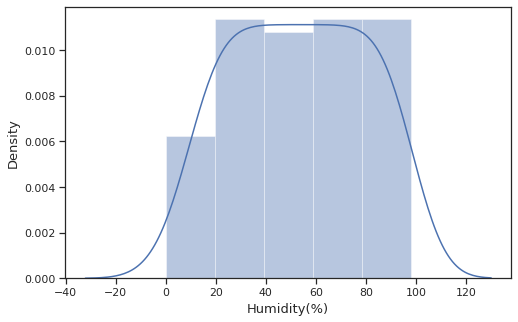

In [ ]:
plt.figure(figsize = (8,5))
bike_weather = pd.DataFrame(bike.groupby('Humidity(%)')['Rented Bike Count'].sum())
bike_weather.reset_index(inplace=True)
sns.distplot(bike_weather['Humidity(%)'])
plt.xlabel('Humidity(%)',size = 13)
plt.ylabel('Density',size = 13)

Text(0, 0.5, 'Density')

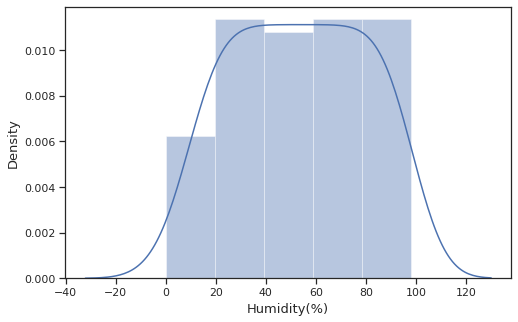

In [ ]:
plt.figure(figsize = (8,5))
bike_weather = pd.DataFrame(bike.groupby('Humidity(%)')['Rented Bike Count'].sum())
bike_weather.reset_index(inplace=True)
sns.distplot(bike_weather['Humidity(%)'])
plt.xlabel('Humidity(%)',size = 13)
plt.ylabel('Density',size = 13)

## get information from our categorical features



====================================================================== Hour ======================================================================




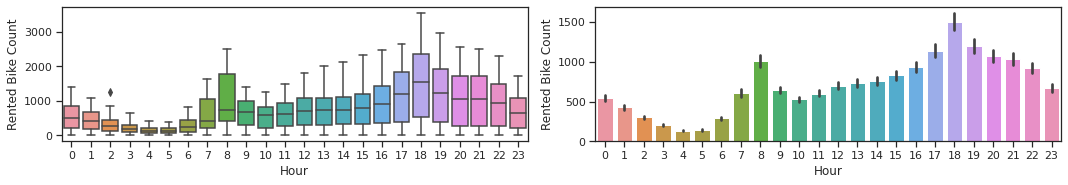



====================================================================== Seasons ======================================================================




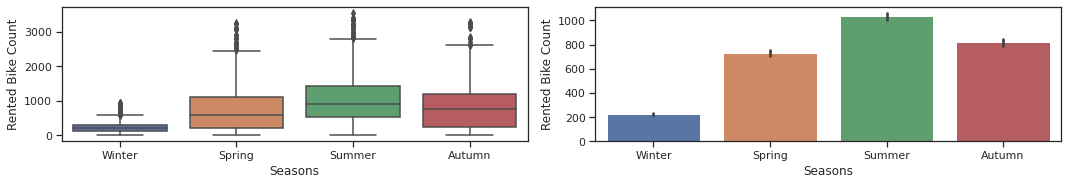



====================================================================== Holiday ======================================================================




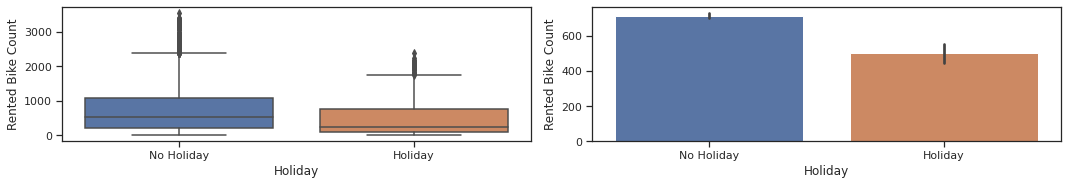



====================================================================== Functioning Day ======================================================================




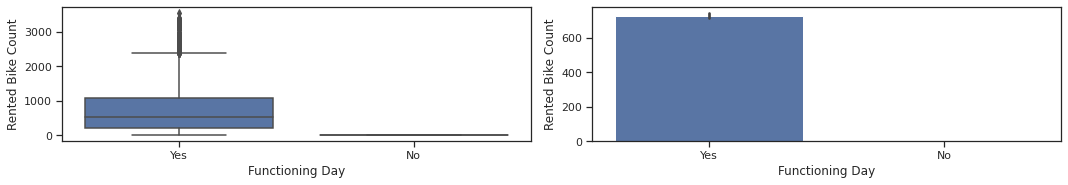



====================================================================== Month ======================================================================




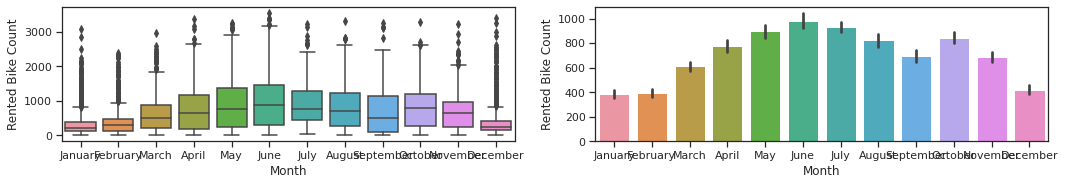



====================================================================== Year ======================================================================




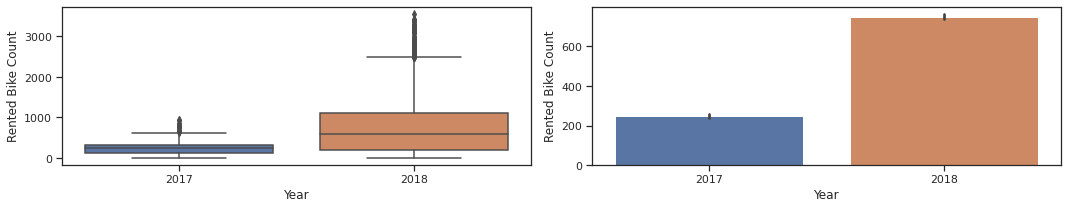

In [ ]:
# creating boxplot plot and bar plot
n=1
for i in categorical_features.columns:
    plt.figure(figsize=(15,15))
    plt.subplot(6,2,n)
    n+=1
    print('\n')
    print('='*70,i,'='*70)
    print('\n')
    sns.boxplot(x=bike[i],y=bike["Rented Bike Count"])
    plt.subplot(6,2,n)
    n+= 1
    sns.barplot(bike[i],bike['Rented Bike Count'])
    plt.tight_layout()
    plt.show()

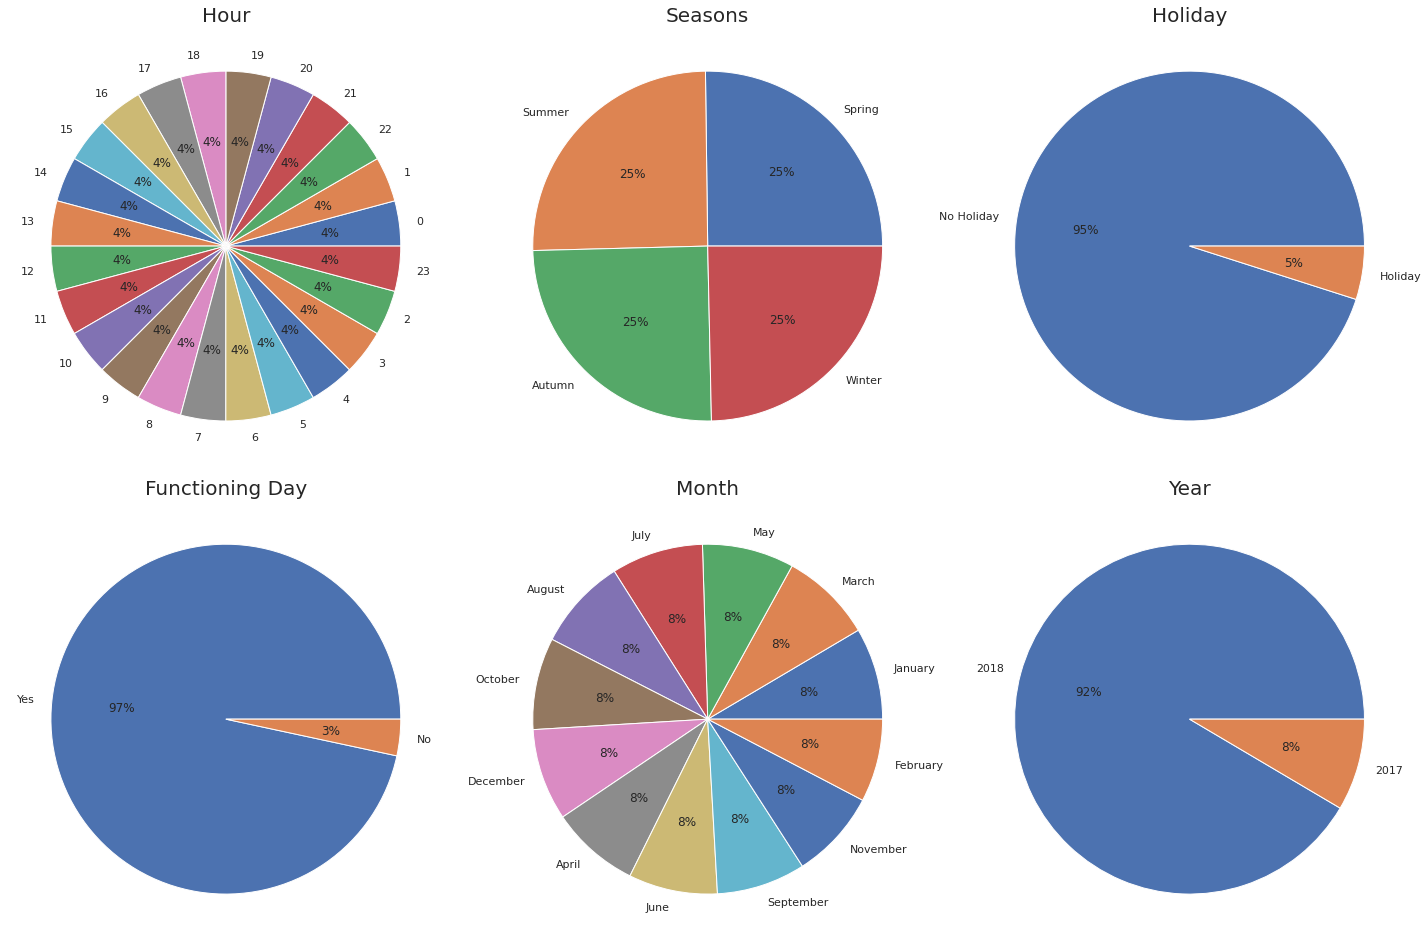

In [ ]:
# creating boxplot for all categorical feature
n = 1
plt.figure(figsize = (20,20))
for i in categorical_features.columns:
    plt.subplot(3,3,n)
    n = n + 1
    plt.pie(bike[i].value_counts(), labels = bike[i].value_counts().keys().tolist(), autopct = '%.0f%%')
    plt.title(i, size = 20)
    plt.tight_layout()

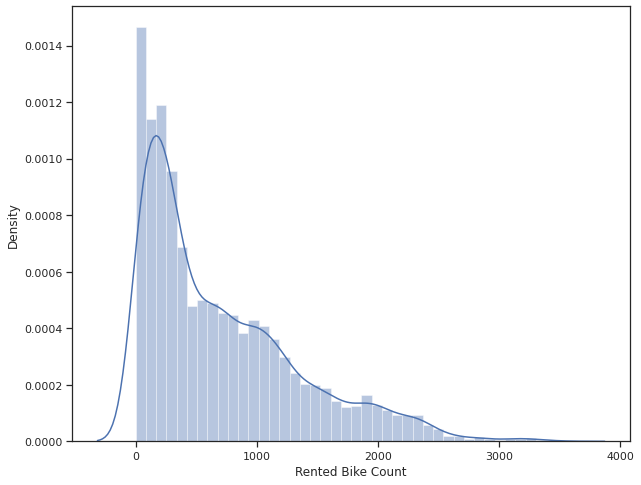

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(bike['Rented Bike Count'])

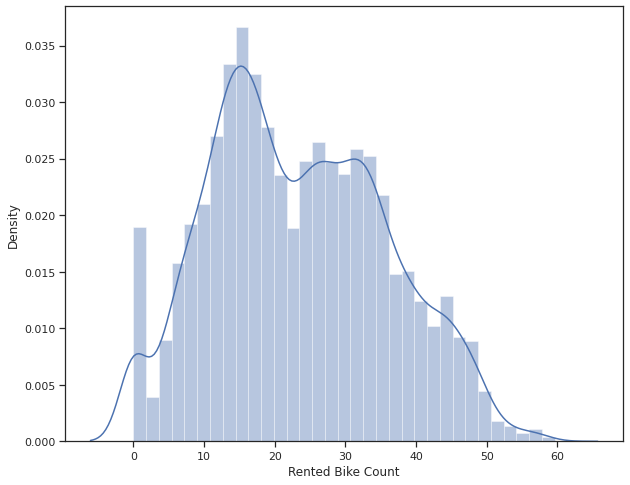

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(bike['Rented Bike Count']))

<Figure size 1440x1152 with 0 Axes>

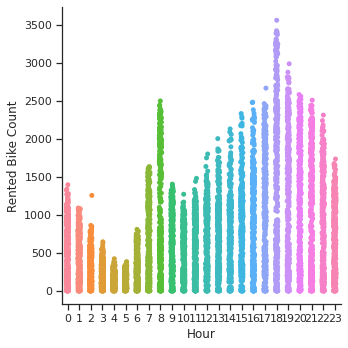

<Figure size 1440x1152 with 0 Axes>

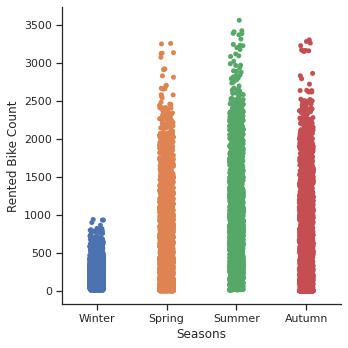

<Figure size 1440x1152 with 0 Axes>

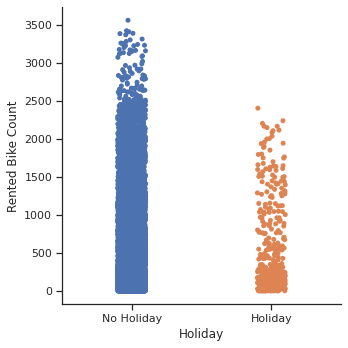

<Figure size 1440x1152 with 0 Axes>

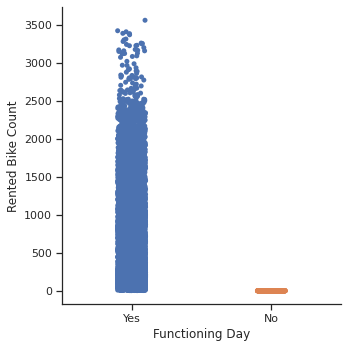

<Figure size 1440x1152 with 0 Axes>

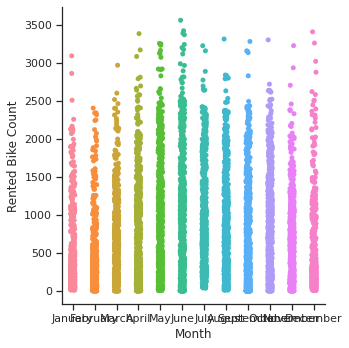

<Figure size 1440x1152 with 0 Axes>

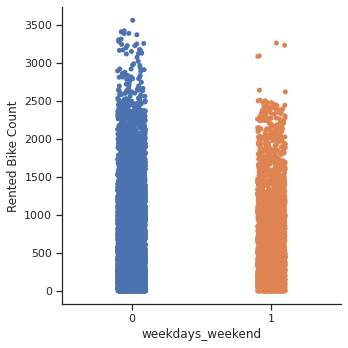

<Figure size 1440x1152 with 0 Axes>

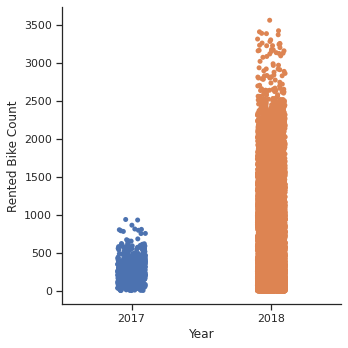

In [ ]:
feature_list = ['Hour','Seasons','Holiday','Functioning Day','Month','weekdays_weekend','Year']
for feature in feature_list:
    plt.figure(figsize = (20,16))
    sns.catplot(x = feature, y = 'Rented Bike Count', data = bike)
    plt.show()

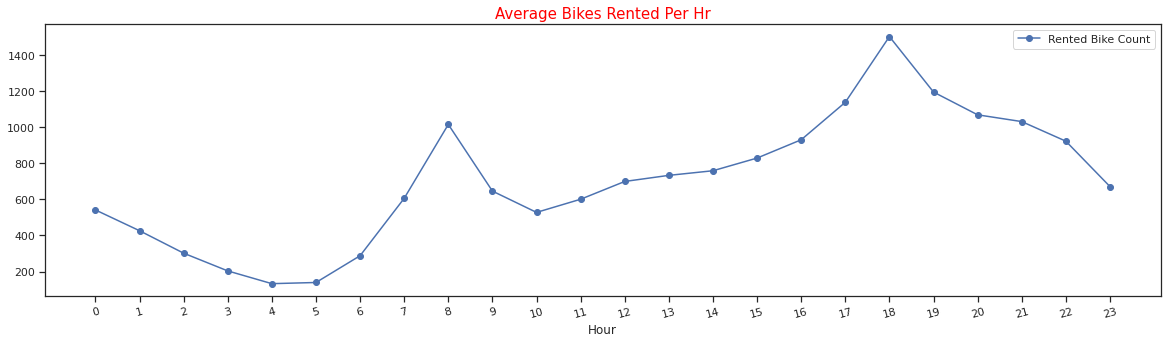

In [ ]:
#ploting line graph
avg_hours = bike.groupby('Hour')['Rented Bike Count'].mean()
plt.figure(figsize = (20,5))
a = avg_hours.plot(legend = True, marker = 'o')
plt.title("Average Bikes Rented Per Hr", size = 15, color = 'Red')
a.set_xticks(range(len(avg_hours)));
a.set_xticklabels(avg_hours.index.tolist(), rotation = 15);

## X_train, X_test, y_train, y_test

In [ ]:
bike_df = pd.get_dummies(bike, drop_first=True, sparse=True)
x = bike_df.drop(columns='Rented Bike Count')
y = np.sqrt(bike_df['Rented Bike Count'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25,random_state=50)

In [ ]:
power = PowerTransformer()
x_train = power.fit_transform(x_train)
x_test = power.transform(x_test)

## Linear Regression

In [ ]:
# Fitting of model
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [ ]:
regression.score(x_train,y_train)

0.7957954297752967

In [ ]:
#predicting 
reg_pred_y_test = regression.predict(x_test)
reg_pred_y_train = regression.predict(x_train)

In [ ]:
# r2 score of train set
r2_linear_train = r2_score(y_train, reg_pred_y_train)
r2_linear_test = r2_score(y_test, reg_pred_y_test)

In [ ]:
r2_linear_train

0.7957954297752967

In [ ]:
r2_linear_test

0.7984554943382332

## Lasso Rregression

In [ ]:
LR= Lasso(alpha=0.0001, max_iter=1000)
LR.fit(x_train, y_train)
LR.score(x_train, y_train)

0.7957954065347109

In [ ]:
def score_metrics(actual,predicted):
    mae = mean_absolute_error(actual**2,predicted**2)
    print('mean absolute error is  :',mae)
    mse = mean_squared_error(actual**2,predicted**2)
    print('mean squared error is  :',mse)
    print('Root mean squared error is  :',np.sqrt(mse))
    print("R2 score is  :",r2_score(actual**2,predicted**2))

In [ ]:
LR_p = LR.predict(x_test)
score_metrics(y_test,LR_p)

mean absolute error is  : 216.38744631648393
mean squared error is  : 102556.44009403874
Root mean squared error is  : 320.24434435917635
R2 score is  : 0.7543694477916142


## Ridge Regression

In [ ]:
R = Ridge()
attributes = {'alpha': [1e-15,1e-12,1e-9,1e-6,1e-3,1e-2,1e-1,0.5,1,1.5,2,2.5,3,6,9,12,15,20,25,30,35,40,45,50,55,60,65,70,80,90,100]}
ridge_regressor = GridSearchCV(R, attributes, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-12, 1e-09, 1e-06, 0.001, 0.01, 0.1,
                                   0.5, 1, 1.5, 2, 2.5, 3, 6, 9, 12, 15, 20, 25,
                                   30, 35, 40, 45, 50, 55, 60, 65, 70, 80, 90, ...]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1.5}

Using  {'alpha': 1.5}  the negative mean squared error is:  -32.00736926569241


In [ ]:
R_p = ridge_regressor .predict(x_test)
score_metrics(y_test,R_p)

mean absolute error is  : 216.3569323031076
mean squared error is  : 102551.17830791157
Root mean squared error is  : 320.2361289859587
R2 score is  : 0.7543820501735888


## Decision Tree Regression

In [ ]:
# training model
dt = DecisionTreeRegressor()
attributes = {'max_depth' : [0.5,1,1.5,2,2.5,3,3.5,4,4.5,6,6.5,7,7.5,8,8.5,9,9.5,10,12,14,16,18,20,24,28,32,36,40]}
g_dt=GridSearchCV(dt,attributes,scoring='r2',cv=6)
g_dt.fit(x_train,y_train)
y_dt=g_dt.best_estimator_
best_dt_testScore=y_dt.score(x_test,y_test)
r2_decision_test = y_dt.score(x_test,y_test)

In [ ]:
# extracting best parameters
print(f"R2 decision score is {g_dt.best_score_} with max depth {g_dt.best_params_['max_depth']}")
print('\n')
print(f"R2 test score is : {y_dt} with max depth = {g_dt.best_params_['max_depth']}")

R2 decision score is 0.8158035074461404 with max depth 20


R2 test score is : DecisionTreeRegressor(max_depth=20) with max depth = 20
